In [1]:
import pandas as pd
import numpy as np

In [2]:
# step 1
data = pd.read_csv("BOOk.csv")
data1 = pd.concat([data.ix[:,2:3],data.ix[:,12:]], axis=1)
data1.head()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


,m_label,r0c0,r0c1,r0c2,r0c3,r0c4,r0c5,r0c6,r0c7,r0c8,...,r19c10,r19c11,r19c12,r19c13,r19c14,r19c15,r19c16,r19c17,r19c18,r19c19
0,64258,1,1,1,1,1,1,1,71,234,...,49,209,209,240,255,255,255,253,209,209
1,64257,1,1,1,1,1,1,1,71,234,...,49,209,209,240,255,255,255,253,209,209
2,61704,1,1,1,30,103,186,251,111,1,...,160,1,1,1,1,1,1,1,1,1
3,61703,1,1,1,77,128,255,255,255,255,...,58,224,255,255,160,96,1,1,1,1
4,61702,1,1,1,1,85,96,181,255,255,...,255,124,91,1,1,1,1,1,1,1


In [3]:
def xandy(data1):
    data1array = np.array(data1)
    res = []
    resy = []
    for s in range(data1.shape[0]):
        resy.append(data1array[s][0])
        temp = np.zeros((20, 20))
        for r in range(20):
            for c in range(20):
                temp[r][c] = data1array[s][r+20*c+1]/255
        res.append(temp)
    return np.array(res) ,np.array(resy)   

In [31]:
xandy(data1)

(array([[[0.00392157, 0.00392157, 0.00392157, ..., 0.00392157,
          0.00392157, 0.81960784],
         [0.00392157, 0.00392157, 0.00392157, ..., 0.00392157,
          0.00392157, 0.81960784],
         [0.00392157, 0.00392157, 0.00392157, ..., 0.00392157,
          0.09803922, 0.89803922],
         ...,
         [0.00392157, 0.00392157, 0.00392157, ..., 0.00392157,
          0.21568627, 0.99215686],
         [0.00392157, 0.00392157, 0.00392157, ..., 0.00392157,
          0.00392157, 0.81960784],
         [0.00392157, 0.00392157, 0.00392157, ..., 0.00392157,
          0.00392157, 0.81960784]],
 
        [[0.00392157, 0.00392157, 0.00392157, ..., 0.00392157,
          0.00392157, 0.81960784],
         [0.00392157, 0.00392157, 0.00392157, ..., 0.00392157,
          0.00392157, 0.81960784],
         [0.00392157, 0.00392157, 0.00392157, ..., 0.00392157,
          0.09803922, 0.89803922],
         ...,
         [0.00392157, 0.00392157, 0.41960784, ..., 0.00392157,
          0.39215686, 0.

In [4]:
# step 2 
def firstMap(yarray):
    unique = 0
    maps = dict()
    for y in yarray:
        if y not in maps:
            unique += 1
            maps[y] = unique-1 
    return maps    

In [5]:
X = xandy(data1)[0]
#y = commaps(xandy(data1)[1])[0]
maps = firstMap(xandy(data1)[1])

In [6]:
def commaps(yarray,maps):    # for any input file starting from 2nd file, the length of 1 hot representation remains the same for further evaluation on un-trained data set
    hot = np.zeros((yarray.shape[0],len(maps)))
    for i in range(1,len(yarray)):
        if yarray[i] in maps:
            hot[i][maps[yarray[i]]] = 1
    return hot

In [7]:
y = commaps(xandy(data1)[1],maps)

In [8]:
# step 3 keras

import keras as keras

model = keras.models.Sequential([
    keras.layers.Conv2D(filters=128 ,kernel_size=(4,4),activation='relu',input_shape=(20, 20, 1)),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Conv2D(filters=64 ,kernel_size=(4,4)),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(units= 64,activation='relu'),
    keras.layers.Dense(units=y.shape[1], activation='softmax')
])

Using TensorFlow backend.
W0723 14:33:06.525914 4570428864 deprecation_wrapper.py:119] From /usr/local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0723 14:33:06.540985 4570428864 deprecation_wrapper.py:119] From /usr/local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0723 14:33:06.543473 4570428864 deprecation_wrapper.py:119] From /usr/local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0723 14:33:06.562893 4570428864 deprecation_wrapper.py:119] From /usr/local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0723 14:33:06.591759 4570428864 deprecation_wrap

In [9]:
import tensorflow as tf
model.compile(loss='categorical_crossentropy',
                  optimizer='rmsprop',
                  metrics=['accuracy'])

W0723 14:33:09.640705 4570428864 deprecation_wrapper.py:119] From /usr/local/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0723 14:33:09.664110 4570428864 deprecation_wrapper.py:119] From /usr/local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [14]:
# step 4
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, KFold

In [15]:
X = np.reshape(X, (-1, 20, 20, 1))
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.5)

In [39]:
model.fit(np.array(X_train), np.array(y_train), epochs=50, batch_size=32)

train_loss, train_acc = model.evaluate(np.array(X_train), np.array(y_train), batch_size=32)
print('Train accuracy:', train_acc)

test_loss, test_acc = model.evaluate(np.array(X_test), np.array(y_test), batch_size=32)
print('Test accuracy:', test_acc)

Epoch 1/50
1334/1334 [==============================] - 1s 665us/step - loss: 6.5064 - acc: 0.0000e+00
Epoch 2/50
1334/1334 [==============================] - 1s 453us/step - loss: 6.3148 - acc: 0.0075
Epoch 3/50
1334/1334 [==============================] - 1s 483us/step - loss: 5.5988 - acc: 0.0382
Epoch 4/50
1334/1334 [==============================] - 1s 638us/step - loss: 4.6479 - acc: 0.1102
Epoch 5/50
1334/1334 [==============================] - 1s 457us/step - loss: 3.6826 - acc: 0.2196
Epoch 6/50
1334/1334 [==============================] - 1s 469us/step - loss: 2.9037 - acc: 0.3051
Epoch 7/50
1334/1334 [==============================] - 1s 451us/step - loss: 2.3857 - acc: 0.3711
Epoch 8/50
1334/1334 [==============================] - 1s 450us/step - loss: 2.0563 - acc: 0.4250
Epoch 9/50
1334/1334 [==============================] - 1s 450us/step - loss: 1.8245 - acc: 0.4700
Epoch 10/50
1334/1334 [==============================] - 1s 454us/step - loss: 1.5893 - acc: 0.5030
Epoch

In [40]:
# try a network with different topology

model2 = keras.models.Sequential([
    #keras.layers.Conv2D(filters=128 ,kernel_size=(3,3),activation='relu',input_shape=(20, 20, 1)),
    #keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Conv2D(filters=128 ,kernel_size=(3,3)),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dropout(0.3),
    #keras.layers.Dense(units= 64,activation='relu'),
    keras.layers.Dense(units=y.shape[1], activation='softmax')
])

model2.compile(loss='categorical_crossentropy',
                  optimizer='rmsprop',
                  metrics=['accuracy'])


In [41]:
model2.fit(np.array(X_train), np.array(y_train), epochs=50, batch_size=32)

train2_loss, train2_acc = model2.evaluate(np.array(X_train), np.array(y_train), batch_size=32)

test2_loss, test2_acc = model2.evaluate(np.array(X_test), np.array(y_test), batch_size=32)

print('Train2 accuracy:', train2_acc)
print('Test2 accuracy:', test2_acc)

Epoch 1/50
1334/1334 [==============================] - 3s 2ms/step - loss: 6.2895 - acc: 0.0802
Epoch 2/50
1334/1334 [==============================] - 2s 2ms/step - loss: 4.1069 - acc: 0.3276
Epoch 3/50
1334/1334 [==============================] - 2s 2ms/step - loss: 2.3012 - acc: 0.5375
Epoch 4/50
1334/1334 [==============================] - 2s 2ms/step - loss: 1.5757 - acc: 0.6357
Epoch 5/50
1334/1334 [==============================] - 3s 2ms/step - loss: 1.1489 - acc: 0.7166
Epoch 6/50
1334/1334 [==============================] - 2s 2ms/step - loss: 0.9162 - acc: 0.7534
Epoch 7/50
1334/1334 [==============================] - 3s 2ms/step - loss: 0.7640 - acc: 0.7931
Epoch 8/50
1334/1334 [==============================] - 2s 2ms/step - loss: 0.6541 - acc: 0.8253
Epoch 9/50
1334/1334 [==============================] - 2s 2ms/step - loss: 0.5984 - acc: 0.8433
Epoch 10/50
1334/1334 [==============================] - 3s 2ms/step - loss: 0.5503 - acc: 0.8418
Epoch 11/50
1334/1334 [======

The above model2 is slightly better than the first model.

In [16]:
def acc_font_model2(df):
    
    data2 = pd.concat([df.ix[:,2:3],df.ix[:,12:]], axis=1)

    X2 = xandy(data2)[0]
    y2 = commaps(xandy(data2)[1],maps)
    
    X2 = np.reshape(X2, (-1, 20, 20, 1))
    X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, random_state=1, test_size=0.5)
    
    model2 = keras.models.Sequential([
        #keras.layers.Conv2D(filters=128 ,kernel_size=(3,3),activation='relu',input_shape=(20, 20, 1)),
        #keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Conv2D(filters=128 ,kernel_size=(3,3)),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Flatten(),
        keras.layers.Dropout(0.3),
        #keras.layers.Dense(units= 64,activation='relu'),
        keras.layers.Dense(units=y2.shape[1], activation='softmax')
    ])

    model2.compile(loss='categorical_crossentropy',
                  optimizer='rmsprop',
                  metrics=['accuracy'])
    
    model2.fit(np.array(X_train2), np.array(y_train2), epochs=50, batch_size=32)

    train2_loss2, train2_acc2 = model2.evaluate(np.array(X_train2), np.array(y_train2), batch_size=32)

    test2_loss2, test2_acc2 = model2.evaluate(np.array(X_test2), np.array(y_test2), batch_size=32)

    print('Train2 accuracy2:', train2_acc2)
    print('Test2 accuracy2:', test2_acc2)
    
    return model2

In [43]:
data2_ = pd.read_csv('AGENCY.csv')
acc_font_model2(data2_)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


Epoch 1/50
502/502 [==============================] - 1s 3ms/step - loss: 6.2475 - acc: 0.0239
Epoch 2/50
502/502 [==============================] - 1s 2ms/step - loss: 4.2359 - acc: 0.2729
Epoch 3/50
502/502 [==============================] - 1s 2ms/step - loss: 2.5735 - acc: 0.4900
Epoch 4/50
502/502 [==============================] - 1s 2ms/step - loss: 1.5882 - acc: 0.6135
Epoch 5/50
502/502 [==============================] - 1s 2ms/step - loss: 1.1067 - acc: 0.7171
Epoch 6/50
502/502 [==============================] - 1s 2ms/step - loss: 0.8430 - acc: 0.7649
Epoch 7/50
502/502 [==============================] - 1s 2ms/step - loss: 0.7202 - acc: 0.7908
Epoch 8/50
502/502 [==============================] - 1s 2ms/step - loss: 0.6355 - acc: 0.8227
Epoch 9/50
502/502 [==============================] - 1s 2ms/step - loss: 0.5275 - acc: 0.8426
Epoch 10/50
502/502 [==============================] - 1s 2ms/step - loss: 0.4834 - acc: 0.8606
Epoch 11/50
502/502 [============================

Training data on a different set, it performs worse. 

In [17]:
df1 = pd.read_csv("BELL.csv")
df2 = pd.read_csv("BERLIN.csv")
df3 = df1.append(df2)
myModel = acc_font_model2(df3)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until
W0723 14:35:04.614427 4570428864 deprecation.py:323] From /usr/local/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/50
1484/1484 [==============================] - 4s 2ms/step - loss: 5.2953 - acc: 0.1078
Epoch 2/50
1484/1484 [==============================] - 4s 3ms/step - loss: 2.2909 - acc: 0.4791
Epoch 3/50
1484/1484 [==============================] - 3s 2ms/step - loss: 1.3013 - acc: 0.6577
Epoch 4/50
1484/1484 [==============================] - 3s 2ms/step - loss: 0.9442 - acc: 0.7379
Epoch 5/50
1484/1484 [==============================] - 3s 2ms/step - loss: 0.7437 - acc: 0.7985
Epoch 6/50
1484/1484 [==============================] - 3s 2ms/step - loss: 0.6124 - acc: 0.8282
Epoch 7/50
1484/1484 [==============================] - 3s 2ms/step - loss: 0.5421 - acc: 0.8356
Epoch 8/50
1484/1484 [==============================] - 3s 2ms/step - loss: 0.4518 - acc: 0.8558
Epoch 9/50
1484/1484 [==============================] - 4s 2ms/step - loss: 0.3857 - acc: 0.8848
Epoch 10/50
1484/1484 [==============================] - 3s 2ms/step - loss: 0.3578 - acc: 0.8868
Epoch 11/50
1484/1484 [======

The model2 (my better model) performs better with more input data to train and test.

In [18]:
# after reserving the 1 hot representation from the 1st input file and make all the further files stick to this
# 1st map ( if not in this 1st maps, ignore), the dimension of this y.shape[1] layer matches

df3 = pd.read_csv("BRADLEY.csv")

d3 = pd.concat([df3.ix[:,2:3],df3.ix[:,12:]], axis=1)

X3 = xandy(d3)[0]
y3= commaps(xandy(d3)[1],maps)
    
X3 = np.reshape(X3, (-1, 20, 20, 1))

t3_loss2, t3_acc2 = myModel.evaluate(np.array(X3), np.array(y3), batch_size=32)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


980/980 [==============================] - 0s 258us/step


In [20]:
print(t3_loss2)
print(t3_acc2)

6.234147496126136
0.25000000012164214


Q: What accuracy do you see when testing with inputs from a font you didn't train on?

A: about 0.25 accuracy

In [48]:
df1 = pd.read_csv("BELL.csv")
df2 = pd.read_csv("BERLIN.csv")
df3 = df1.append(df2)

data2 = pd.concat([df3.ix[:,2:3],df3.ix[:,12:]], axis=1)

X2 = xandy(data2)[0]
y2 = commaps(xandy(data2)[1],maps)
    
X2 = np.reshape(X2, (-1, 20, 20, 1))
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, random_state=1, test_size=0.5)
    
model2 = keras.models.Sequential([
    #keras.layers.Conv2D(filters=128 ,kernel_size=(3,3),activation='relu',input_shape=(20, 20, 1)),
    #keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Conv2D(filters=128 ,kernel_size=(3,3)),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dropout(0.3),
    #keras.layers.Dense(units= 64,activation='relu'),
    keras.layers.Dense(units=y2.shape[1], activation='softmax')
])

model2.compile(loss='categorical_crossentropy',
                  optimizer='rmsprop',
                  metrics=['accuracy'])
    
model2.fit(np.array(X_train2), np.array(y_train2), epochs=50, batch_size=32)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """


Epoch 1/50
1484/1484 [==============================] - 4s 3ms/step - loss: 5.2901 - acc: 0.1173
Epoch 2/50
1484/1484 [==============================] - 4s 2ms/step - loss: 2.2934 - acc: 0.4805
Epoch 3/50
1484/1484 [==============================] - 3s 2ms/step - loss: 1.3025 - acc: 0.6590
Epoch 4/50
1484/1484 [==============================] - 3s 2ms/step - loss: 0.9239 - acc: 0.7399
Epoch 5/50
1484/1484 [==============================] - 3s 2ms/step - loss: 0.7310 - acc: 0.7823
Epoch 6/50
1484/1484 [==============================] - 3s 2ms/step - loss: 0.6109 - acc: 0.8214
Epoch 7/50
1484/1484 [==============================] - 3s 2ms/step - loss: 0.5077 - acc: 0.8538
Epoch 8/50
1484/1484 [==============================] - 4s 3ms/step - loss: 0.4514 - acc: 0.8592
Epoch 9/50
1484/1484 [==============================] - 3s 2ms/step - loss: 0.3959 - acc: 0.8787
Epoch 10/50
1484/1484 [==============================] - 3s 2ms/step - loss: 0.3619 - acc: 0.8807
Epoch 11/50
1484/1484 [======

In [49]:
train2_loss2, train2_acc2 = model2.evaluate(np.array(X_train2), np.array(y_train2), batch_size=32)

test2_loss2, test2_acc2 = model2.evaluate(np.array(X_test2), np.array(y_test2), batch_size=32)

print('Train2 accuracy2:', train2_acc2)
print('Test2 accuracy2:', test2_acc2)

1484/1484 [==============================] - 0s 252us/step
Train2 accuracy2: 0.9615902964959568
Test2 accuracy2: 0.5902964959568733


In [26]:
import matplotlib.pyplot as plt

The misclassified ones


<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

3


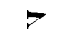

4


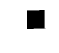

7


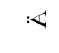

8


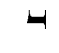

9


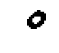

13


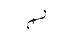

16


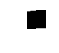

19


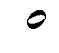

23


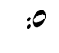

25


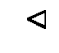

26


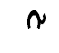

27


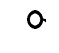

32


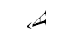

35


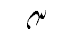

36


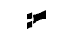

37


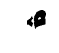

39


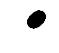

41


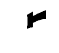

43


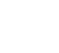

47


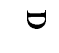

48


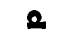

49


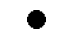

62


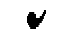

64


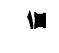

68


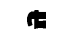

69


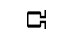

70


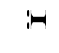

72


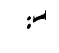

73


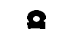

74


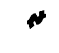

76


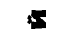

80


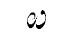

82


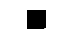

91


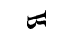

93


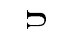

95


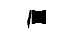

99


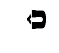

In [91]:
# see the misclassified fonts 
y_pred = model2.predict(X_test2, batch_size = 32, verbose = 0, steps=None)

print('The misclassified ones')
plt.figure(figsize= (10, 10))    
for i in range(100):
    m = np.amax(y_pred[i])
    for j in range(len(y_pred[i])):
        if y_pred[i][j]==m:
            y_pred[i][j] = 1
        else:
            y_pred[i][j] = 0

plt.figure(figsize= (10, 10))            
for i in range(100): 
    if not np.array_equal(y_pred[i],y_test2[i]):
        print(i)
        plt.subplot(10, 10, i+1) 
        plt.imshow(np.reshape(X_test2[i],(20, 20)), cmap='Greys',interpolation='nearest')
        plt.axis('off')
    plt.show()      


The unsure ones: relative probability <= 0.6


<Figure size 720x720 with 0 Axes>

0.493179


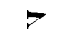

0.3484897


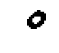

0.36090755


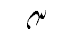

0.5649593


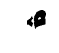

0.43105805


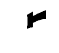

0.28980228


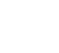

0.4565668


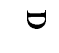

0.37364718


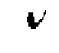

0.44757542


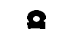

0.5915868


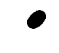

0.33593664


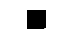

0.3489976


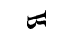

0.53052545


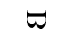

all the first 100 characters


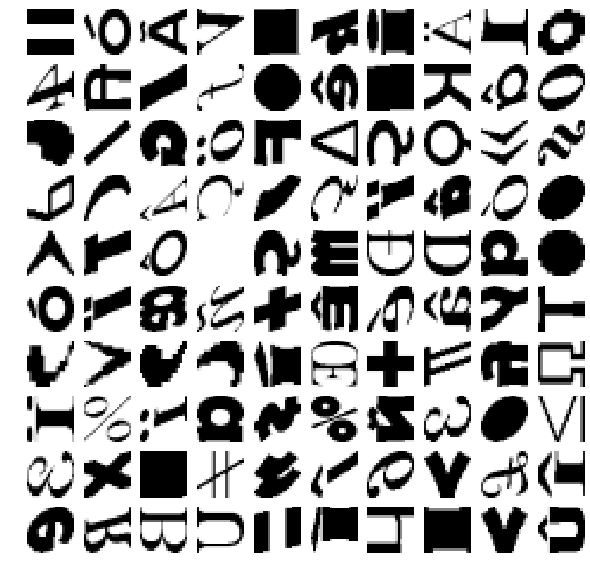

In [52]:
# see the unsure fonts and compare them with all the fonts (first 100 fonts)
print('The unsure ones: relative probability <= 0.6')
plt.figure(figsize= (10, 10))    
for i in range(100):
    if np.amax(y_pred[i])<=0.6:
        print(np.amax(y_pred[i]))
        plt.subplot(10, 10, i+1)
        plt.imshow(np.reshape(X_test2[i],(20, 20)), cmap='Greys',interpolation='nearest')
        plt.axis('off')
    plt.show()

print('all the first 100 characters')
plt.figure(figsize= (10, 10))    
for i in range(100):
    plt.subplot(10, 10, i+1)
    plt.imshow(np.reshape(X_test2[i],(20, 20)), cmap='Greys',interpolation='nearest')
    plt.axis('off')
plt.show()

Q: Do you notice any patterns (on misclassified)? 

A: The one with small detailed parts(like i with 2 dots), or the one has similar fonts (like square). Latter one is easy to understand intuitively: NN needs more delicate details to distingush the latter one from its similar fonts since for the bulk part they are very much the same. But the delicate details involves small area with thin boundaries, which has only few neurons from previous layer, or few pixels from input. Fewer points are more likely to have lower accuracy, and more easily to be misclassified.

Q:Can you find examples where the network is unsure of the result?

A: It seems from the graphs that the ones with less detailed and unique boundaries are more confusing to NN. My understanding is that NN needs to divide input pixels into neurons which are kind of transformed disassembled pieces of input; if the input has more detailed and unique pieces (more complex and clean small boundaries) then the corresponding nuerons are more illustrative (sure) for classification. Otherwise NN was confused (unsure).

In general, the misclassified and unsure ones are opppsite to each other. There has to be some trade off between the two.

In [ ]:
 # step 5. denoising images

In [22]:
df1 = pd.read_csv("BOOK.csv")
df2 = pd.read_csv("BERLIN.csv")
df3 = df1.append(df2)

data2 = pd.concat([df3.ix[:,2:3],df3.ix[:,12:]], axis=1)

X2 = xandy(data2)[0]
y2 = commaps(xandy(data2)[1],maps)
    
X2 = np.reshape(X2, (-1, 20, 20, 1))
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, random_state=1, test_size=0.5)
 

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """


In [23]:
x_train_2d = np.reshape(X_train2, (X_train2.shape[0], 20, 20 , 1))
x_test_2d = np.reshape(X_test2, (X_test2.shape[0], 20, 20 , 1))

In [24]:
noise_factor = 0.5
x_train_noisy = x_train_2d + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train_2d.shape) 
x_test_noisy = x_test_2d + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test_2d.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

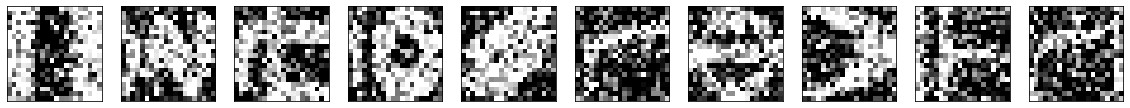

In [28]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(20, 20))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [30]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K

input_img = Input(shape=(20, 20, 1))  # adapt this if using `channels_first` image data format

x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
denoiser_encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (7, 7, 32)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(denoiser_encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
denoiser_decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

denoiser = Model(input_img, denoiser_decoded)
denoiser.compile(optimizer='adadelta', loss='binary_crossentropy')

W0723 14:57:23.582195 4570428864 deprecation_wrapper.py:119] From /usr/local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:2018: The name tf.image.resize_nearest_neighbor is deprecated. Please use tf.compat.v1.image.resize_nearest_neighbor instead.



In [34]:
from keras.callbacks import TensorBoard
denoiser.fit(x_train_noisy, x_train_2d,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test_2d),
                callbacks=[TensorBoard(log_dir='/tmp/denoiser', histogram_freq=0, write_graph=False)])

Train on 2340 samples, validate on 2340 samples
Epoch 1/50
2340/2340 [==============================] - 2s 716us/step - loss: 0.3768 - val_loss: 0.3532
Epoch 2/50
2340/2340 [==============================] - 2s 661us/step - loss: 0.3708 - val_loss: 0.3643
Epoch 3/50
2340/2340 [==============================] - 2s 665us/step - loss: 0.3551 - val_loss: 0.3632
Epoch 4/50
2340/2340 [==============================] - 2s 673us/step - loss: 0.3439 - val_loss: 0.3340
Epoch 5/50
2340/2340 [==============================] - 2s 665us/step - loss: 0.3367 - val_loss: 0.3352
Epoch 6/50
2340/2340 [==============================] - 2s 672us/step - loss: 0.3292 - val_loss: 0.3269
Epoch 7/50
2340/2340 [==============================] - 2s 680us/step - loss: 0.3228 - val_loss: 0.3327
Epoch 8/50
2340/2340 [==============================] - 2s 682us/step - loss: 0.3177 - val_loss: 0.3139
Epoch 9/50
2340/2340 [==============================] - 2s 678us/step - loss: 0.3114 - val_loss: 0.3173
Epoch 10/50
2340

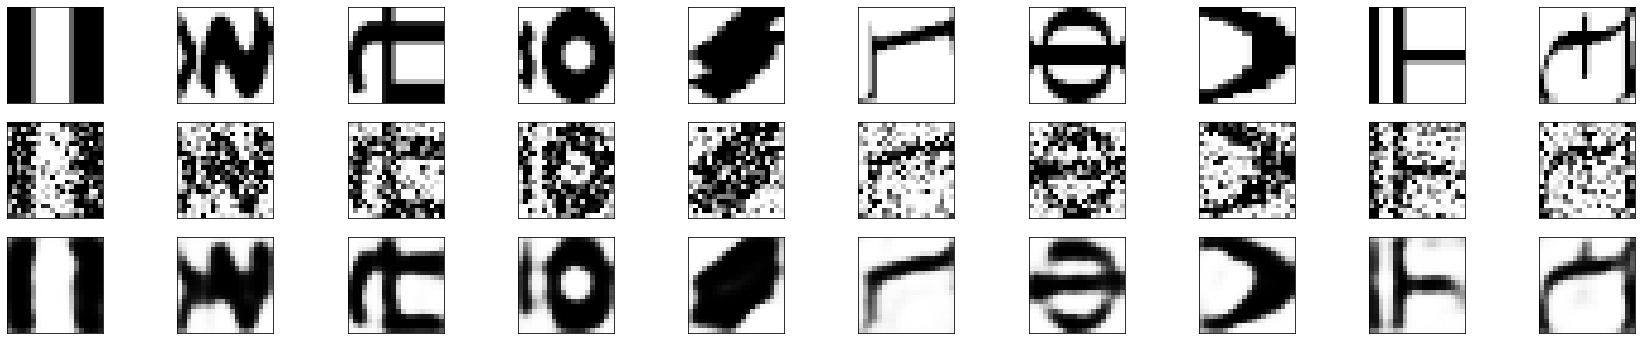

In [35]:
# encode and decode some digits
# note that we take them from the *test* set
denoised_images = denoiser.predict(x_test_noisy)

n = 10  # how many digits we will display
plt.figure(figsize=(30, 6))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test_2d[i].reshape(20, 20), cmap="Greys", interpolation=None)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # noisy version
    ax = plt.subplot(3, n, n+ i + 1)
    plt.imshow(x_test_noisy[i].reshape(20, 20), cmap="Greys", interpolation=None)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display denoised version
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(denoised_images[i].reshape(20, 20), cmap="Greys", interpolation=None)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()